In [63]:
from land_cover import load
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
from libpysal.weights import KNN, DistanceBand
from esda.moran import Moran
from splot.esda import moran_scatterplot
import contextily

In [81]:
gdf = load.loadEfflux()

# Assume 'gdf' is your GeoDataFrame and 'your_variable' is the column you're analyzing
variable = 'AvgOfpCO2'
variable = 'AvgOfTempC'

gdf = gdf.to_crs('EPSG:3857')

gdf.head()

,ID,Lat_DD,Lon_DD,AvgOfTempC,AvgOfpH,AvgOfALKum,AvgOfCO2_o,StDevOfCO2,AvgOfpCO2,StDevOfpCO,EID,geometry
0,15031700,58.168286,-133.726735,5.00,6.70,119.88,78.780219,0.000000,1234.682567,0.000000,e0,POINT (-14886392.046 8002752.565)
1,15051000,58.341619,-134.403160,1.50,7.20,319.68,75.041211,20.143512,1025.733067,249.206896,e1,POINT (-14961691.332 8039426.02)
2,15056120,59.468840,-135.299331,5.50,6.30,319.68,520.969456,0.000000,8315.749472,0.000000,e2,POINT (-15061452.632 8282418.689)
3,15056310,59.224951,-135.447940,12.25,6.60,849.15,582.689855,205.993601,11276.942548,795.016390,e3,POINT (-15077995.71 8229167.098)
4,15057860,55.102713,-131.565289,10.50,6.75,309.69,163.063331,44.072168,3025.846654,105.243959,e4,POINT (-14645780.978 7381826.185)


(-20000000.0, -14000000.0)

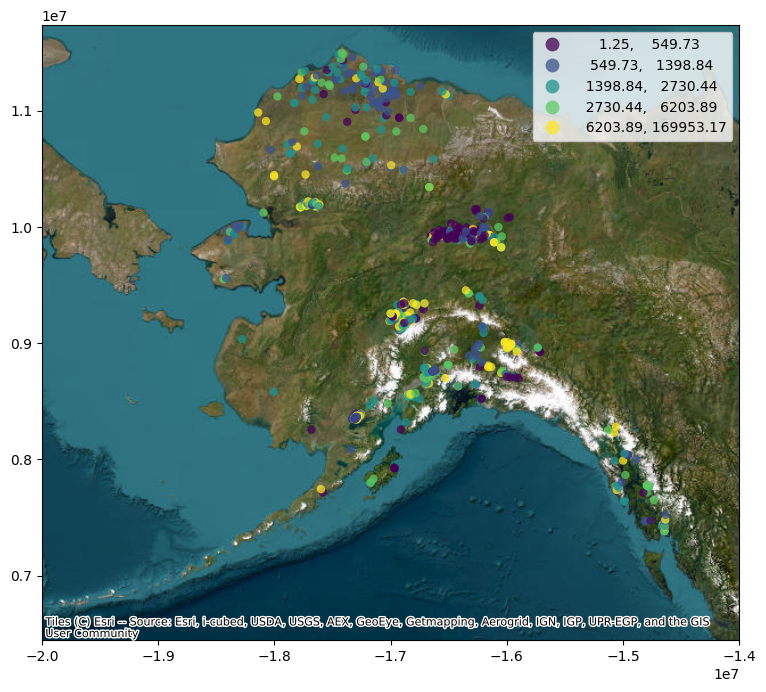

In [37]:
f, ax = plt.subplots(1, figsize=(9, 9))
gdf.plot(
    column=variable,
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    # legend_kwds={"loc": 2},
    ax=ax,
)
contextily.add_basemap(
    ax,
    crs=gdf.crs,
    source=contextily.providers.Esri.WorldImagery,
    zoom=4
)
# ax.set_axis_off()
ax.set_xlim([-2.e7, -1.4e7])
# ax.set_ylim([ymin, ymax])

In [75]:
# Create spatial weights matrix 
w = KNN.from_dataframe(gdf, k=8)
# w = DistanceBand(gdf[['Lat_DD',	'Lon_DD']], 2.) # not projected, one degree max leads to islands

# Standardize the weights matrix
w.transform = 'R'

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [65]:
DistanceBand?

Init signature:
DistanceBand(
    data,
    threshold,
    p=2,
    alpha=-1.0,
    binary=True,
    ids=None,
    build_sp=True,
    silence_warnings=False,
    distance_metric='euclidean',
    radius=None,
)
Docstring:     
Spatial weights based on distance band.

Parameters
----------
data        : array
              (n,k) or KDTree where KDtree.data is array (n,k)
              n observations on k characteristics used to measure
              distances between the n objects
threshold  : float
             distance band
p          : float
             DEPRECATED: use `distance_metric`
             Minkowski p-norm distance metric parameter:
             1<=p<=infinity
             2: Euclidean distance
             1: Manhattan distance
binary     : boolean
             If true w_{ij}=1 if d_{i,j}<=threshold, otherwise w_{i,j}=0
             If false wij=dij^{alpha}
alpha      : float
             distance decay parameter for weight (default -1.0)
             if alpha is positive 

In [76]:
w.weights
# np.any([0.125 not in weights for weights in w.weights.values()])

{0: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 1: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 2: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 3: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 4: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 5: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 6: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 7: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 8: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 9: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 10: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 11: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 12: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 13: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 14: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 15: [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
 1

Moran's I: 0.14491017737073542
p-value: 0.001
z-score: 9.694386050668184


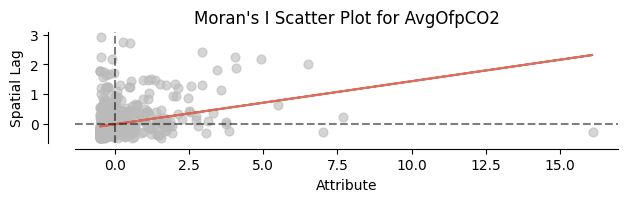

In [80]:

# Compute Moran's I
y = gdf[variable].values
moran = Moran(y, w)

# Print Moran's I results
print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")
print(f"z-score: {moran.z_sim}")

# Moran scatter plot
fig, ax = moran_scatterplot(moran,
                            aspect_equal=True)
plt.title(f"Moran's I Scatter Plot for {variable}")
plt.show()
